In [3]:

import lucem_illud 

import requests 
import pandas 
import matplotlib.pyplot as plt 
import wordcloud 
import numpy as np 
import scipy 
import seaborn as sns 
import sklearn.manifold 
import json 
import urllib.parse 


import spacy


import graphviz 
import os.path
import zipfile
import subprocess
import io
import tempfile
import nltk


%matplotlib inline

## <font color="red">*Exercise 1*</font>

<font color="red">Construct cells immediately below this that input and interrogate a corpus relating to your anticipated final project. This could include one of the Davies corpora or some other you have constructed. Turn your text into an nltk `Text` object, and explore all of the features examined above, and others that relate to better understanding your corpus in relation to your research question. </font>

## <font color = "Green"> I use the data I had collected in the first assignment and then utilize several techniques for its preliminary analysis. These are matrimonial advertisements from a newspaper called "The Tribune" circulated in the northern part of India. The corpus mainly is analyzed on advertisements seeking brides and grooms in 2002 except for the last exercise where I compare 4 documents, bride seeking and grrom seeking ads from 2002, and bride seeking and groom seeking ads from 2014.</font>

In [4]:
import csv
brides_wanted = []

file = open('brides-wanted_2002.csv')

csvreader = csv.reader(file)


for row in csvreader:
    brides_wanted.extend(row)
concat_list = [' '.join([str(item) for item in brides_wanted])]


In [5]:
nlp = spacy.load("en_core_web_sm")

## <font color = "Green"> Tokenizing words</font>

In [6]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [7]:
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)

In [8]:
countedWords = wordCounter(word_tokenize(concat_list[0]))
countedWords[:10]


,word,count
0,note,106
1,please,226
2,do,116
3,not,230
4,send,546
5,any,114
6,images,106
7,photographs,108
8,with,742
9,your,128


Word counts organized in a descending order. As we see, words such as beautiful, girl, sikh, educated, tend to appear frequently.

In [9]:
countedWords.sort_values('count', ascending=False, inplace=True)
countedWords[:10]

,word,count
21,for,4900
20,match,3900
26,girl,3364
37,beautiful,2130
38,sikh,1748
66,in,1636
57,family,1438
94,slim,1374
52,educated,1208
19,suitable,1122


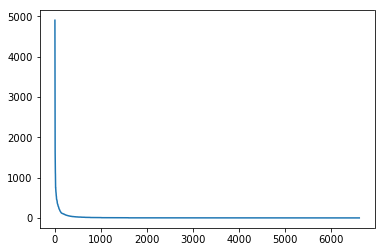

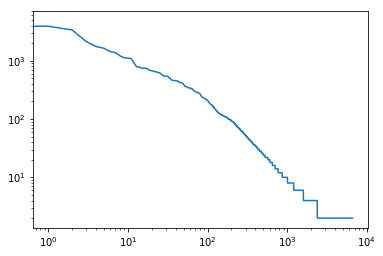

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

## <font color = "Green"> As expected, the words in the corpus are in alignment with Zipf's Law.</font>

In [11]:
BrideText = nltk.Text(word_tokenize(concat_list[0]))

## <font color = "Green"> Beautiful appears almost 2000(out of around 6000) times in ads that describe brides for prospective grooms. </font>

In [12]:
BrideIndex = nltk.text.ConcordanceIndex(BrideText) 
BrideIndex.print_concordance('beautiful')

Displaying 25 of 2028 matches:
 Amritsar Cantt 8910ABOL Match for beautiful Sikh TonkKashtriya girl 23/53 gr
cer 9874FOL Well settled match for beautiful smart convent educated from status
 Suitable alliance for Kumhar Sikh beautiful attractive girl 54 24 MA BEd dec
iage Manglik non Manglik match for beautiful Hindu Khatri girl 27½ 54½ MSc Ho
match preferably medico for 30/5'4 beautiful Punjabi Brahmin girl working as a 
 for Bansal girl BDS intern 23/158 beautiful slim convented Email dr_sbansal@ya
uired for July 1977/53 slim fair beautiful Sood girl BSc NonMedical MSc mathe
sts one 9932FOL Suitable match for beautiful fair slim Khatri Arora girl 26/51
ly on point basis Jat Sikh boy for beautiful Jat Sikh Staff Nurse girl 23/55 
for convented 27/53 employed BDS beautiful girl Father Supreintending Enginge
emic credentials for 26 years 54 beautiful intelligent sweetnatured US citize
 American citizen convent educated beautiful downtoearth sober Jat Sikh girl 29
boy of st

## <font color="red">*Exercise 2*</font>

<font color="red">Construct cells immediately below this that filter, stem and lemmatize the tokens in your corpus, and then creates plots (with titles and labels) that map the word frequency distribution, word probability distribution, and at least two conditional probability distributions that help us better understand the social and cultural game underlying the production of your corpus. Create a wordl of words (or normalized words) and add a few vague comments about what mysteries are revealed through it.</font>

In [13]:
countsDict = {}
for word in (word_tokenize(concat_list[0])):
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:20]

[('for', 4734),
 ('girl', 3240),
 ('match', 2788),
 ('beautiful', 2028),
 ('Sikh', 1708),
 ('in', 1528),
 ('slim', 1330),
 ('family', 1316),
 ('fair', 1052),
 ('educated', 1050),
 ('Match', 1026),
 ('Suitable', 898),
 ('Jat', 886),
 ('well', 726),
 ('from', 716),
 ('with', 712),
 ('settled', 712),
 ('and', 682),
 ('Khatri', 652),
 ('MA', 648)]

In [14]:
#The stop list is then all words that occur before the first noun
stop_words_freq = ['for','well', 'no', 'and','with','only','match','invited','bar','d','bam', 'alliance','invited', 'a','by',
                   'looking','family','our', 'in','from','note','send','please','do','not','any','your','reply','they','can',
                   'be', 'images','photographs','forwarded','due','to','technical','reasons','suitable', 'uly72/5"','born'
                  'ma','bed','cantt','8910abol','23/5\x923\x94','girl','email']

In [15]:
cleaned_list = []
for word in word_tokenize(concat_list[0]):
    if word.lower() not in stop_words_freq:
        cleaned_list.append(word)
        

In [17]:
def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

In [18]:
normalized_tokens = pandas.Series(word_tokenize(concat_list[0])).apply(lambda x: normalizeTokens(x, stop_words_freq))

In [19]:
normalized_token_count = normalized_tokens.apply(lambda x: len(x))

In [20]:
Brides_normalized_info = pandas.DataFrame({'normalized tokens':normalized_tokens,'normalized token counts':normalized_token_count})

## <font color = "Green"> frequency distribution of words used in ads seeking grooms.</font>

In [21]:
bridesfdist = nltk.ConditionalFreqDist(((len(w), w) for w in normalized_tokens.sum()))

#print the number of words
print(bridesfdist.N())

76242


## <font color = "Green"> Out of the top 15 3 letter words, we see words such as mba, bsc, mca which shows an emphasis on education, whether it is mentioned in context of the bride or groom. We also see heavy emphasis or preference for members from ethnic communities —'jat' is a donimant ethnic community in northern india. </font>

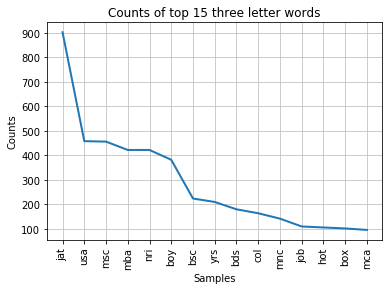

In [70]:
bridesfdist[3].plot(15, title = "Counts of top 15 three letter words")

## <font color = "Green"> Similarly, the most widely used 4 letter word is 'sikh' which is another predominant ethnic community in northern India.</font>

## <font color = "Green"> Calculating the probability distribution </font>

In [23]:
bridespdist = nltk.ConditionalProbDist(bridesfdist, nltk.ELEProbDist)
#print the most common 4 letter word and its probability
print(bridespdist[4].max())
(bridespdist[4].prob(bridespdist[4].max()))

sikh


0.14119594621875883

In [27]:
#print the most common 6 letter word and its probability
print(bridespdist[6].max())
(bridespdist[6].prob(bridespdist[6].max()))

settle


0.06638953910727258

In [24]:
def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags

In [25]:
normalized_tokens_POS= pandas.Series([spacy_pos(t) for t in cleaned_list])

In [26]:
bridesfdist_WordtoPOS = nltk.ConditionalFreqDist(normalized_tokens_POS.sum())
list(bridesfdist_WordtoPOS.items())[:20]

[('saraswat', FreqDist({'VBD': 138})),
 ('brahmin', FreqDist({'NN': 418})),
 ('manglik', FreqDist({'NNP': 278})),
 ('nonmanglik', FreqDist({'NNP': 116})),
 ('born', FreqDist({'VBN': 280})),
 ("july72/5'5", FreqDist({'NNP': 2})),
 ('ma', FreqDist({'NNP': 648})),
 ('teacher', FreqDist({'NN': 204})),
 ('army', FreqDist({'NN': 160})),
 ('school', FreqDist({'NN': 226})),
 ('amritsar', FreqDist({'NNP': 72})),
 ('beautiful', FreqDist({'JJ': 2130})),
 ('sikh', FreqDist({'NNP': 1748})),
 ('tonkkashtriya', FreqDist({'NNP': 30})),
 ('graduate', FreqDist({'NN': 308})),
 ('pgdca', FreqDist({'NNP': 176})),
 ('father', FreqDist({'NN': 742})),
 ('class', FreqDist({'NN': 86})),
 ('i', FreqDist({'PRP': 42})),
 ('officer', FreqDist({'NN': 660}))]

## <font color = "Green"> Calculating frequency distribution of normalized tokens based on the how these words were 
categorized as different parts of speech.</font>

In [29]:
bridesfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in normalized_tokens_POS.sum())

## <font color = "Green"> Words such as girl and slim do appear as most occuring nouns, however with more words such as "email" added to the stopwords, these results could be more insightful.</font>

In [30]:
bridesfdist_POStoWord['NN']

FreqDist({'slim': 1374, 'father': 742, 'status': 742, 'officer': 660, 'contact': 596, 'marriage': 542, 'doctor': 536, 'msc': 456, 'computer': 450, 'convent': 434, ...})

## <font color = "Green"> Among the top 20 proper nouns, 7 appear to be castes/ethnic communities, reiterating the emphasis that these ads lay of these parameters. These are 'sikh','jat','khatri','gursikh','manglik','rajput', and 'ahluwalia'- communities in northern india.</font>

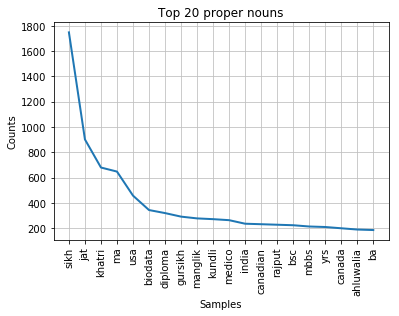

In [31]:
bridesfdist_POStoWord['NNP'].plot(20, title="Top 20 proper nouns")

## <font color = "Green"> The word cloud highlights words such as beautiful, slim, jat, sikh etc which are in line with the observations above.</font>

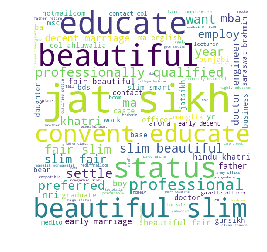

In [32]:
wc = wordcloud.WordCloud(background_color="white", max_words=100, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(normalized_tokens.sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("brides-wanted_word_cloud.pdf", format = 'pdf')

## <font color="red">Exercise 3</font>

<font color="red">In the cells immediately following, perform POS tagging on a meaningful (but modest) subset of a corpus associated with your final project. Examine the list of words associated with at least three different parts of speech. Consider conditional associations (e.g., adjectives associated with nouns or adverbs with verbs of interest). What do these distributions suggest about your corpus?

In [41]:
def sent_tokenize(word_list):
    doc = nlp(str(word_list))
    sentences = [sent.text.strip() for sent in doc.sents]
    return sentences

In [42]:
def tag_sents_pos(sentences):
    """
    function which replicates NLTK pos tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for token in sent:
            pos_sent.append((token.text, token.tag_))
        pos_sents.append(pos_sent)
    
    return pos_sents

In [43]:
brides_df = pandas.read_csv('brides-wanted_2002.csv')
brides_df['bride_info'] = pandas.read_csv('brides-wanted_2002.csv')

In [44]:
brides_df['sentences'] = brides_df['bride_info'].apply(lambda x: [word_tokenize(s) for s in sent_tokenize(x)])

In [45]:
brides_df['POS_sents'] = brides_df['sentences'].apply(lambda x: tag_sents_pos(x))

In [46]:
brides_df['POS_sents'][1:5]

1    [[(Suitable, JJ), (match, NN), (for, IN), (Sar...
2    [[(Match, VB), (for, IN), (beautiful, JJ), (Si...
3    [[(Well, UH), (settled, VBN), (match, NN), (fo...
4    [[(Suitable, JJ), (alliance, NN), (for, IN), (...
Name: POS_sents, dtype: object

## <font color = "Green"> Below I look at words which are nouns, adjectives, and adverbs </font>

In [47]:
countTarget = 'NN'
targetCounts = {}
for entry in brides_df['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('girl', 3224),
 ('match', 2012),
 ('family', 1312),
 ('marriage', 510),
 ('status', 480),
 ('officer', 434),
 ('BEd', 392),
 ('convent', 350),
 ('Alliance', 330),
 ('bar', 310),
 ('boy', 286),
 ('biodata', 272),
 ('business', 272),
 ('daughter', 244),
 ('businessman', 222),
 ('father', 220),
 ('graduate', 220),
 ('citizen', 212),
 ('MSc', 208),
 ('sale', 194)]

In [48]:
countTarget = 'JJ'
targetCounts = {}
for entry in brides_df['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('beautiful', 2028),
 ('fair', 1030),
 ('slim', 1022),
 ('Suitable', 888),
 ('qualified', 480),
 ('smart', 466),
 ('professional', 460),
 ('kanal', 356),
 ('good', 222),
 ('Early', 206),
 ('suitable', 200),
 ('decent', 196),
 ('tall', 176),
 ('Canadian', 170),
 ('handsome', 132),
 ('early', 124),
 ('preferred', 124),
 ('high', 120),
 ('technical', 110),
 ('American', 110)]

In [53]:
countTarget = 'RB'
targetCounts = {}
for entry in brides_df['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('well', 706),
 ('very', 308),
 ('homely', 248),
 ('not', 230),
 ('professionally', 224),
 ('preferably', 156),
 ('Professionally', 144),
 ('only', 132),
 ('highly', 126),
 ('abroad', 98),
 ('extremely', 92),
 ('slim', 78),
 ('presently', 74),
 ('fully', 64),
 ('also', 62),
 ('Only', 58),
 ('pretty', 46),
 ('newly', 36),
 ('Highly', 34),
 ('Preferably', 32)]

## <font color = "Green"> Below I look at the associations of all adverbs with the verb 'match'and all adjectives with the noun 'girl'. As we can see words such as beautiful, homely, slim, cultured, decent, fair, tall, pretty tend to be assiciated with the word girl. Similarly we see words such as only abroad, professionally, cleanshaven etc when looking for a match </font>

In [57]:
NTarget = 'RB'
Word = 'match'
NResults = set()
for entry in brides_df['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1.replace('\x924\x94',''))
            else:
                continue

print(NResults)  

{'Abroad', 'Professionally', 'abroad', 'cleanshaven', 'ARORA', 'Suitably', 'SIKH'}


In [58]:
NTarget = 'JJ'
Word = 'girl'
NResults = set()
for entry in brides_df['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1.replace('\x924\x94',''))
            else:
                continue

print(NResults)  

{'immigrant', 'convented', 'wheatish', 'attractive', 'Christian', 'talentedbeautiful', 'Khatri', 'Canadian', 'smart', 'decent', 'sober', 'slim', 'intelligent', 'urban', 'Goldsmith', 'SOOD', 'Himachali', 'brilliant', 'MCA24½/5', 'Ramgarhia', 'homely', 'SLIM', 'mannered', 'talented', 'natured', 'caring', 'Beautiful', 'Saini', 'beautiful', 'brilliantbeautiful', 'BDSemployed', 'staffnurse', 'Indian', 'protestant', 'coloured', 'charming', 'unmarried', 'local', 'Nurseryteacher', 'Mittal', 'vegetarian', 'pretty', 'tall', 'professional', '5\x925\x94', 'qualified', 'fairbeautiful', 'Bansal', 'fair', 'cultured', 'Sood'}


## <font color="red">*Exercise 4*</font>

<font color="red">Construct cells immediately below this that identify statistically significant bigrams, trigrams, quadgrams, higher-order *n*grams and skipgrams. Explore whether these collocations are idiomatic and so irreducible to the semantic sum of their component words. You can do this by examination of conditional frequencies (e.g., what else is 'united' besides the 'United States'). If these phrases are idiomatic, what do they suggest about the culture of the world producing them?

<font color="red">**Stretch**: In Manning and Schütze's textbook, there Section 5.3.2 explores how to use the *t*-test to find words whose co-occurance patterns best distinguish two words. Implement that and use it to explore phrases in your corpus. For instance, you could tell what words come after "America" much more often than after "Iraq"?</font> 

In [59]:
brideBigrams = nltk.collocations.BigramCollocationFinder.from_words(normalized_tokens.sum())
print("There are {} bigrams in the finder".format(brideBigrams.N))

There are 76242 bigrams in the finder


In [80]:
def bigramScoring(count, wordsTuple, total):
    return count

print(brideBigrams.nbest(bigramScoring, 10))

[('jat', 'sikh'), ('beautiful', 'slim'), ('convent', 'educate'), ('professionally', 'qualified'), ('fair', 'slim'), ('slim', 'beautiful'), ('slim', 'fair'), ('decent', 'marriage'), ('doctor', 'engineer'), ('early', 'marriage')]


In [82]:
birgramScores = []

def bigramPrinting(count, wordsTuple, total):
    global birgramScores
    birgramScores.append("The first word is:  {}, The second word is: {}".format(*wordsTuple))

brideBigrams.nbest(bigramPrinting, 10)
print('\n'.join(birgramScores[:10]))

The first word is:  902, The second word is: 1748
The first word is:  2130, The second word is: 1374
The first word is:  434, The second word is: 1208
The first word is:  378, The second word is: 574
The first word is:  1108, The second word is: 1374
The first word is:  1374, The second word is: 2130
The first word is:  1374, The second word is: 1108
The first word is:  296, The second word is: 542
The first word is:  584, The second word is: 688
The first word is:  362, The second word is: 542


In [83]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
brideBigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]
# other options include student_t, chi_sq, likelihood_ratio, pmi

[(('jat', 'sikh'), 6632.882677907185),
 (('professionally', 'qualified'), 2551.362283185799),
 (('convent', 'educate'), 2380.85298970808),
 (('decent', 'marriage'), 1840.818086249295),
 (('early', 'marriage'), 1657.343822920839),
 (('col', 'ahluwalia'), 1581.4824469292148),
 (('doctor', 'engineer'), 1308.3508103176405),
 (('hindu', 'khatri'), 1279.2602994703975),
 (('saraswat', 'brahmin'), 1271.3745479949437),
 (('tribune', 'chandigarh'), 1269.8478086392236),
 (('clean', 'shaven'), 1140.5878998528726),
 (('hot', 'sale'), 1090.7931099750695),
 (('fair', 'slim'), 1080.8940446074048),
 (('beautiful', 'slim'), 1063.9032926785526),
 (('gazette', 'officer'), 970.2592319906621),
 (('ma', 'english'), 938.8629972574984),
 (('contact', 'col'), 928.2356851503641),
 (('manglik', 'nonmanglik'), 920.0211469236972),
 (('fully', 'marble'), 892.1879815292702),
 (('early', 'decent'), 866.6479939942725),
 (('fair', 'complexion'), 860.7460417801556),
 (('classi', 'officer'), 809.5604016546132),
 (('mair',

## <font color = "Green"> Significant bigrams </font>

In [84]:
brideBigrams.score_ngrams(bigram_measures.student_t)[:20]

[(('jat', 'sikh'), 28.585628349954398),
 (('convent', 'educate'), 17.84347459176808),
 (('professionally', 'qualified'), 16.743256891985197),
 (('beautiful', 'slim'), 16.71568614827349),
 (('fair', 'slim'), 15.53989075849439),
 (('decent', 'marriage'), 14.415699501053782),
 (('slim', 'beautiful'), 14.371096969510113),
 (('early', 'marriage'), 14.243769335972038),
 (('doctor', 'engineer'), 14.198277701293444),
 (('hindu', 'khatri'), 13.577053198170635),
 (('slim', 'fair'), 13.48616198951734),
 (('col', 'ahluwalia'), 11.540530719661353),
 (('saraswat', 'brahmin'), 11.157247189915118),
 (('fair', 'beautiful'), 11.109188803930646),
 (('ma', 'english'), 11.062937013733855),
 (('beautiful', 'fair'), 11.02151930494138),
 (('contact', 'col'), 10.557005793849152),
 (('early', 'decent'), 10.54544864776778),
 (('slim', 'smart'), 10.517260414800258),
 (('gazette', 'officer'), 10.468384476434245)]

## <font color = "Green"> Significant trigrams </font>

In [85]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
brideTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(normalized_tokens.sum())
brideTrigrams.score_ngrams(trigram_measures.student_t)[:20]

[(('contact', 'col', 'ahluwalia'), 10.48778386142673),
 (('early', 'decent', 'marriage'), 10.487135872735196),
 (('father', 'classi', 'officer'), 7.998407203378027),
 (('beautiful', 'fair', 'slim'), 7.930268734180016),
 (('beautiful', 'slim', 'fair'), 7.542523795674986),
 (('slim', 'fair', 'beautiful'), 7.542523795674986),
 (('father', 'gazette', 'officer'), 7.481737206100351),
 (('beautiful', 'jat', 'sikh'), 7.130983215760163),
 (('hot', 'sale', 'kanal'), 6.928009931388173),
 (('fair', 'slim', 'beautiful'), 6.700079469224024),
 (('dowry', 'seeker', 'excuse'), 6.324550473809623),
 (('professionally', 'qualified', 'settle'), 6.319704033499359),
 (('jat', 'sikh', 'parent'), 6.149893503783186),
 (('status', 'jat', 'sikh'), 5.966456215436792),
 (('jat', 'sikh', 'beautiful'), 5.903708542965451),
 (('kanal', 'double', 'storey'), 5.83087202325673),
 (('fair', 'slim', 'smart'), 5.808494029252205),
 (('beautiful', 'convent', 'educate'), 5.798005473509959),
 (('box', 'tribune', 'chandigarh'), 5.

## <font color = "Green">  Significant quadgrams </font>
The focal point across all grams tends to be sikh or other ethnic communities. This is because "col" "sale""hot""kanal" were all part of a junk advertisement and must be removed using the stop words. Without them, sikh, jat and other communitites tend to be the focal point in a bride or groom search.

In [200]:
from nltk.metrics.association import QuadgramAssocMeasures
gram_measures = QuadgramAssocMeasures()
brideQuads = nltk.collocations.QuadgramCollocationFinder.from_words(normalized_tokens.sum())
brideQuads.score_ngrams(gram_measures.student_t)[:20]

[(('hot', 'sale', 'kanal', 'single'), 4.4721357193362845),
 (('nri', 'contact', 'col', 'ahluwalia'), 4.472132000802409),
 (('sale', 'kanal', 'single', 'storey'), 4.242640466830353),
 (('sector', '36a', 'contact', 'col'), 4.24263963911866),
 (('sikh', 'parent', 'invite', 'correspondence'), 4.242639123735174),
 (('jat', 'sikh', 'parent', 'invite'), 4.242613568417962),
 (('professionally', 'qualified', 'jat', 'sikh'), 4.242458745286768),
 (('jat', 'sikh', 'convent', 'educate'), 4.2422010589257075),
 (('beautiful', 'slim', 'convent', 'educate'), 4.241824661288123),
 (('36a', 'contact', 'col', 'ahluwalia'), 3.9999993714322035),
 (('sector', 'contact', 'col', 'ahluwalia'), 3.9999964800203403),
 (('jat', 'sikh', 'parent', 'seek'), 3.999921927028331),
 (('single', 'storey', 'good', 'house'), 3.741657272738488),
 (('kanal', 'double', 'storey', 'sector'), 3.741656838228311),
 (('clean', 'shaven', 'jat', 'sikh'), 3.741650540825823),
 (('want', 'doctor', 'engineer', 'usa'), 3.741608114469475),
 ((

 ## <font color = "Green">  Conditional frequency of bigrams containing the word sikh </font>
 The results show that the word Sikh tends to appear mostly with the word jat or Jatt or with other religious communities within the Sikh community, these are Grewal, and Saini. This again reiterates the presence of strong emphasis of caste and ethnicity even within the ost predominant community.

In [202]:
target = 'sikh'

dic = {}

for bi in list(nltk.bigrams(concat_list[0].split())): 
    if target in bi: 
        if bi not in dic: 
            dic[bi] = 1
        dic[bi] += 1

In [203]:
dic

{('Jat', 'sikh'): 7,
 ('sikh', 'Grewal'): 3,
 ('sikh', 'parents'): 3,
 ('sikh', 'boys'): 3,
 ('Jatt', 'sikh'): 3,
 ('sikh', 'MBBS/BDS'): 3,
 ('saini', 'sikh'): 3,
 ('sikh', 'girl'): 3}

## <font color="red">*Exercise 5*</font>

<font color="red">In the cells immediately following, perform NER on a (modest) subset of your corpus of interest. List all of the different kinds of entities tagged? What does their distribution suggest about the focus of your corpus? For a subset of your corpus, tally at least one type of named entity and calculate the Precision, Recall and F-score for the NER classification just performed.

In [207]:
def tag_sents_ner(sentences):
    """
    function which replicates NLTK ner tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for ent in sent.ents:
            pos_sent.append((ent.text, ent.label_))
        pos_sents.append(pos_sent)
    
    return pos_sents

In [208]:
brides_df['classified_sents'] = brides_df['sentences'].apply(lambda x: tag_sents_ner(x))

In [209]:
brides_df['classified_sents'][:20]

0                                                  [[]]
1     [[(Saraswat Brahmin Manglik, ORG), (MA, PERSON)]]
2     [[(Sikh TonkKashtriya, PERSON), (23/53, CARD...
3     [[(Sikh, PERSON), (27/53 MBA UGC, PRODUCT), ...
4     [[(Kumhar Sikh, PERSON), (54, CARDINAL), (MA...
5                                                  [[]]
6     [[(Manglik, ORG), (Hindu, NORP), (Khatri, GPE)...
7     [[], [(BEAUTIFUL FAIR, PERSON), (SLIM MA, PERS...
8     [[(Brahmin Khatri, PERSON), (Saraswat Brahmin,...
9     [[(30/5'4, CARDINAL), (Punjabi Brahmin, ORG), ...
10    [[(BDS, ORG), (23/158, CARDINAL), (9930FOL, DA...
11    [[(Mittal, ORG), (24/52 BPharma, CARDINAL), ...
12    [[(24/53, CARDINAL), (BCom, GPE), (MFC PGDCA...
13    [[(July, DATE), (1977/53, CARDINAL), (NonMed...
14    [[(Khatri Arora, PERSON), (26/51 MA, PERSON)...
15    [[(Khatria, PERSON), (Canada, GPE), (US, GPE),...
16      [[(5/26 year old, DATE), (9904FOL, CARDINAL)]]
17    [[(Canadian, NORP), (Jat Sikh, PERSON), (t

 ## <font color = "Green">  Even in the list of entities tagged, "Jat Sikh" which are religious communities tend to have the highest count, which when combined with findings above seems believable as the focal point of the distribution of words in this corpus. </font>

In [212]:
entityCounts = {}
for entry in brides_df['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if ent in entityCounts:
                entityCounts[ent] += 1
            else:
                entityCounts[ent] = 1
sortedEntities = sorted(entityCounts.items(), key = lambda x: x[1], reverse = True)
sortedEntities

[('Jat Sikh', 544),
 ('Khatri', 356),
 ('one', 288),
 ('Hindu', 286),
 ('MA', 242),
 ('USA', 238),
 ('NRI', 210),
 ('US', 204),
 ('India', 196),
 ('Canadian', 176),
 ('Canada', 158),
 ('Sikh', 150),
 ('English', 122),
 ('Arora', 108),
 ('two', 100),
 ('Medico', 100),
 ('Army', 94),
 ('American', 94),
 ('Gursikh', 94),
 ('MNC', 92),
 ('MBA', 92),
 ('UK', 88),
 ('Engineer', 88),
 ('Himachali', 84),
 ('PGDCA', 82),
 ('BCom', 80),
 ('Saraswat Brahmin', 78),
 ('Send', 78),
 ('25', 74),
 ('Indian', 74),
 ('5\x924\x94', 70),
 ('BDS', 70),
 ('Ramgarhia Sikh', 70),
 ('Email', 66),
 ('26', 66),
 ('America', 58),
 ('Ramgarhia', 56),
 ('BA', 54),
 ('Contact', 54),
 ('Ramdasia Sikh', 52),
 ('Delhi', 52),
 ('first', 52),
 ('One', 50),
 ('5\x923\x94', 50),
 ('MCA', 48),
 ('Manglik', 46),
 ('25/5\x924\x94', 46),
 ('Jatsikh', 46),
 ('Saini Sikh', 46),
 ('UGC', 46),
 ('BHP', 44),
 ('Arora Sikh', 42),
 ('23', 42),
 ('Punjabi Khatri', 40),
 ('5\x922\x94', 40),
 ('28', 40),
 ('8', 40),
 ('Khatri Arora', 38

In [211]:
nonObjCounts = {}
for entry in brides_df['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'ORG':
                continue
            elif ent in nonObjCounts:
                nonObjCounts[ent] += 1
            else:
                nonObjCounts[ent] = 1
sortedNonObj = sorted(nonObjCounts.items(), key = lambda x: x[1], reverse = True)
sortedNonObj[:10]

[('Jat Sikh', 544),
 ('Khatri', 340),
 ('one', 288),
 ('Hindu', 286),
 ('USA', 236),
 ('US', 204),
 ('India', 196),
 ('Canadian', 176),
 ('Canada', 158),
 ('Sikh', 128)]

In [296]:
OrgCounts = {}
for entry in brides_df['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'ORG':
                print(ent)

Saraswat Brahmin Manglik
PGDCA
MA
Manglik
Saraswat Brahmin
MNC
NRI
Punjabi Brahmin
BDS
Mittal
NonMedical
Dental Surgeon
Attn Mr Harkishan
MNC
Govt Officers
Army
BDS
Preference
Ludhiana Dist Mobile
Commerce
USA Decent
BCom India
Pursuing Computer
IAS
MNC
AC
MDS MD MBBS BDS
Brothers Engineer
USA Girl
Visa
NRI
Computer Science
Wellqualified
inig2623@yahoocom
Send
BA
Preference
Medicos Engineer Lecturer Military Civil
MA Psy India
Manglik Punjabi Saraswat Brahmin
WebDesigning
Computer Science
Gotra Rupal Daffu Preferred
Saraswat Punjabi Brahmin
Govt Officer
Send
girl26/55 12th
Punjabi
NRI
Bank Required IAS
Software Engineers
Medico
BDS
MNC
Army
Alcohol MBBS MD
NY NJ
Air Force
Medical College Punjab
BDS
PGDCA Public School
Manglik Jat Sikh
BA
ExSr Executive
BCom
Manglik
Hindu Khatri Punjabi
Asstt
Chemical Engineer
KHATRI
Diploma Computers Fashion Designing
Professional
Contact Brij Lal
NRI
Contact Col Ahluwalia
NRI Contact Col Ahluwalia
MNC
Himachali Rajput Central School
PGT
BA
Science N

Computer Engineer
MA
MPhil
Doaba
Ex Air Force
U R
Britishborn University
Genuine
Punjabi Brahmin
BHP
Computer Diploma Medical Asstt
USA Parents
MCA
NewZealand
MNC Applied Canada
BTech Computer Engg 25/55
Hons Eng
NRI MNC Civil Service Jat Sikh
medico nonmedico Indian NRI
kundli decent
Economics
Panipat
Army
MA
MBBS
Medico
Goyal
Send
Army
Army
Punjab University Please
MBA
MNC
MNC
Gaur Brahmin
PGDHFW
MPhil
UGC
NRI
Contact Col Ahluwalia
Indian Forest Service
MNC
Army
Medico
MCA Send
Central Government
GAMSgirl
Garg
PGDCA
MCA
Medico
Match Brahmin
FatherIAS
MD MS
Punjabi Saraswat Brahmin
MBA UGC NET
NRI
Medico
nonMedico
PCS
2312CEPOL
IAS IPS
BE MBA
Human Resource Management
Sr Management Executive
VRS
Khatri
BDS
IAS IPS
Send
USA Father
Army
MCA
Amritsar One
MSS
NRI
BA Economics
NRI
MBA
MNC Highly
Army
BTech
Army
NRI
CollegeLecturer
Contact Post
Mohali
SDO PWD
Hindu Rajput
Manglik Mair Rajput
HomoeopathDoctor Computer
USA Doctor Engineer
Lakeport Court
NRI Employed
Preference
LDH Jalandhar

## <font color="red">*Exercise 6*</font>

<font color="red">In the cells immediately following, parse a (modest) subset of your corpus of interest. How deep are the phrase structure and dependency parse trees nested? How does parse depth relate to perceived sentence complexity? What are five things you can extract from these parses for subsequent analysis? (e.g., nouns collocated in a noun phrase; adjectives that modify a noun; etc.) Capture these sets of things for a focal set of words (e.g., "Bush", "Obama", "Trump"). What do they reveal about the roles that these entities are perceive to play in the social world inscribed by your texts?

In [214]:
from spacy import displacy

In [215]:
for index, row in brides_df[15:16].iterrows():
    text = ' '.join(row['sentences'][0])
    print(text)
    doc = nlp(text)
    for token in doc:
        print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])
    displacy.render(doc,style='dep',options = {'distance':120})

Looking for professionally settled Tonk Khatria boy in Canada or US for Dental Surgeon girl in India For further infoplz call in Punjab at or in Canada at Attn
Looking ROOT Looking VERB [for, For]
for prep Looking VERB [boy]
professionally advmod settled VERB []
settled amod boy NOUN [professionally]
Tonk compound boy NOUN []
Khatria compound boy NOUN []
boy pobj for ADP [settled, Tonk, Khatria, in, for]
in prep boy NOUN [Canada]
Canada pobj in ADP [or, US]
or cc Canada PROPN []
US conj Canada PROPN []
for prep boy NOUN [girl]
Dental compound Surgeon PROPN []
Surgeon compound girl NOUN [Dental]
girl pobj for ADP [Surgeon, in]
in prep girl NOUN [India]
India pobj in ADP []
For prep Looking VERB [call]
further amod call NOUN []
infoplz amod call NOUN []
call pobj For ADP [further, infoplz, in, at, at]
in prep call NOUN [Punjab]
Punjab pobj in ADP []
at prep call NOUN [or, in]
or cc at ADP []
in conj at ADP [Canada]
Canada pobj in ADP []
at prep call NOUN [Attn]
Attn pobj at ADP []


## <font color = "Green"> The above dependency parse tree is extremely nested because most of the sentences in these advertisements are not punctuated. However, a few insights can still be drawn for instance, for is a preposition associated with looking, and settled is an adjective modifier for boy and professionally is an adverb related to settled. Other words such as Khataria and Tonk which are proper nouns are related to the buy and rightly so because they are ethnic communities again and talk about the prospective groom here. Other relations between compound words such as dental and surgeon can also be made.</font>

## <font color="red">*Exercise 7*</font>

<font color="red">Construct cells immediately below this that calculate the KL and $\chi^2$ divergences, and the KS and Wasserstein distances between four separate corpora, plot these with heatmaps, and then array them in two dimensions with multidimensional scaling as above. What does this reveal about relations between the corpora? Which analysis (and divergence or distribution) distinguishes the authors or documents better?

**Stretch**: Calculate the [Jensen-Shannon Divergence](https://en.wikipedia.org/wiki/Jensen–Shannon_divergence) between your four corpora. What is the relationship between the KL and JS divergences?</font> 

 ## <font color = "Green"> For this exercise I consider 4 documents, bride seeking ads from 2002 and 2014, and grrom seeking ads from 2002 and 2014. </font>

In [92]:
brides_info_2002= pandas.read_csv('brides-wanted_2002.csv')

In [93]:
brides_info_2002['text'] = pandas.read_csv('brides-wanted_2002.csv')

In [94]:
grooms_info_2002 = pandas.read_csv('grooms-wanted_2002.csv')

In [95]:
grooms_info_2002['text'] = pandas.read_csv('grooms-wanted_2002.csv')

In [97]:
brides_info_2014= pandas.read_csv('brides-wanted_2014.csv')
brides_info_2014['text']= pandas.read_csv('brides-wanted_2014.csv')

In [98]:
grooms_info_2014= pandas.read_csv('grooms-wanted_2014.csv')
grooms_info_2014['text']= pandas.read_csv('grooms-wanted_2014.csv')

In [181]:
grooms_info_2002['tokenized_text'] = grooms_info_2002['text'].apply(lambda x: word_tokenize(str(x)))
grooms_info_2002['normalized_tokens'] = grooms_info_2002['tokenized_text'].apply(lambda x: normalizeTokens(x))

In [182]:
brides_info_2002['tokenized_text'] = brides_info_2002['text'].apply(lambda x: word_tokenize(str(x)))
brides_info_2002['normalized_tokens'] = brides_info_2002['tokenized_text'].apply(lambda x: normalizeTokens(x))

In [183]:
grWords = set(grooms_info_2002['normalized_tokens'].sum())
brWords = set(brides_info_2002['normalized_tokens'].sum())
overlapWords = grWords & brWords

overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}
overlapWordsDict['sikh']

863

In [184]:
def makeProbsArray(dfColumn, overlapDict):
    words = dfColumn.sum()
    countList = [0] * len(overlapDict)
    for word in words:
        try:
            countList[overlapDict[word]] += 1
        except KeyError:
            #The word is not common so we skip it
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum()

grProbArray = makeProbsArray(grooms_info_2002['normalized_tokens'], overlapWordsDict)
brProbArray = makeProbsArray(brides_info_2002['normalized_tokens'], overlapWordsDict)
grProbArray.sum()

1.0

In [185]:
gr_brDivergence = scipy.stats.entropy(grProbArray, brProbArray)
print(gr_brDivergence)
br_grDivergence = scipy.stats.entropy(brProbArray, grProbArray)
print (br_grDivergence)

0.35832443060756675
0.3409618935132953


In [186]:
gr_brchi = scipy.stats.chisquare(grProbArray, brProbArray).statistic
print(gr_brchi)
br_grchi = scipy.stats.chisquare(brProbArray, grProbArray).statistic
print(br_grchi)

1.453935200245136
1.9238773539101945


In [187]:
gr_brDivergence_ew = scipy.special.kl_div(grProbArray, brProbArray)
kl_df = pandas.DataFrame(list(overlapWordsDict.keys()), columns = ['word'], index = list(overlapWordsDict.values()))
kl_df = kl_df.sort_index()
kl_df['elementwise divergence'] = gr_brDivergence_ew
kl_df[40:50]

,word,elementwise divergence
40,lect,4.786056e-05
41,bhagat,8.148483e-06
42,institute,2.790041e-05
43,professionally,1.007343e-04
44,kg,6.757860e-06
45,yamuna,8.148483e-06
46,dba,8.747980e-08
47,partner,2.624394e-07
48,market,1.749596e-07
49,clinical,4.786056e-05


In [188]:
kl_df.sort_values(by='elementwise divergence', ascending=False)[:5]

,word,elementwise divergence
745,boy,0.047911
399,handsome,0.039671
1264,son,0.017207
796,ma,0.006214
1414,tall,0.006048


In [189]:
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
  
    P = pandas.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pandas.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

In [190]:
file = open('grooms-wanted_2002.csv')
brides_wanted = []
csvreader = csv.reader(file)


for row in csvreader:
    brides_wanted.extend(row)
concat_list_1 = [' '.join([str(item) for item in brides_wanted])]


In [191]:
file = open('grooms-wanted_2014.csv')
grooms_wanted = []
csvreader = csv.reader(file)


for row in csvreader:
    grooms_wanted.extend(row)
concat_list_2 = [' '.join([str(item) for item in grooms_wanted])]


In [192]:
file = open('brides-wanted_2014.csv')
brides_wanted = []
csvreader = csv.reader(file)


for row in csvreader:
    brides_wanted.extend(row)
concat_list_3 = [' '.join([str(item) for item in brides_wanted])]


In [217]:
final_df = pandas.DataFrame({'info':[concat_list[0][200001:],concat_list_1[0][200020:],concat_list_2[0][5000000:],concat_list_3[0][149486000:]]})

In [218]:
final_df['tokenized_text'] = final_df['info'].apply(lambda x: word_tokenize(str(x)))
final_df['normalized_tokens'] = final_df['tokenized_text'].apply(lambda x: normalizeTokens(str(x)))

In [221]:
final_df['ad category'] = ['grooms wanted 2002','brides wanted 2002','grooms wanted 2014','brides wanted 2014']

 ## <font color = "Green"> the structure of advertisements for brides and grooms tend to be similar, since they use similar sentences and this continues in ads even later on. Thus the tests that could be used are two fold. Within the same year, it might be interesting to see how similar word distributions are and hence, might be meaningful to use the chi2 or KS test, however, across years it might be interesting to see how far documents are from each other and use the KL divergence. For instance, the KS divergence between ads of grooms wnated in 2002 and brides wanted in 2014 is around .6 and 0.4 between grooms wanted in 2002 and 2014. Since these results rely on data of varying sizes and one that isn't completely clean, from a preliminary analysis, seems like different purposes for the ads solicit different tests. For instance, it might be interesting to see why ads for brides wanted in 2014 are so drastically far away from other ads across years. </font>

0.0
0.4779817464731395
0.700281743582333
1.5039341127251398
0.5950828709474267
0.0
0.4375752498126907
1.269592091521055
1.0564688255703791
0.6856264559019309
0.0
1.5407516706124276
5.709507912083344
5.709163197798809
5.112710598937971
0.0


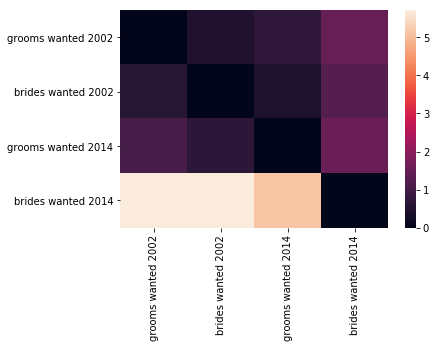

In [222]:
final_df.set_index('ad category')
measure = 'KL'
num_of_texts = 4
fileids_sp = list(final_df[:num_of_texts]['ad category'])
corpora_sp = list(final_df[:num_of_texts]['normalized_tokens'])
L = []
for p in corpora_sp:
    l = []
    for q in corpora_sp:
        l.append(Divergence(p,q, difference=measure))
        print((Divergence(p,q, difference=measure)))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids_sp, index = fileids_sp)
ax = sns.heatmap(div)
plt.show()

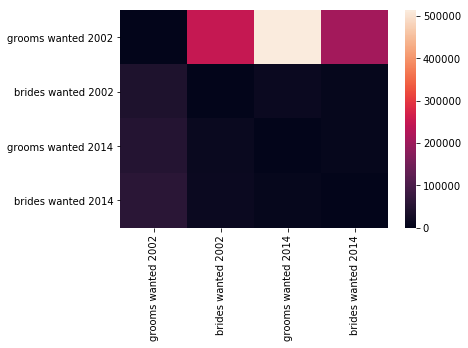

In [223]:
measure = 'Chi2' #"KL", "Chi2", "KS", "Wasserstein"
num_of_texts = 4 #The bigger this number the slower it will run, you can also try selecting your own plays
fileids_sp = list(final_df[:num_of_texts]['ad category'])
corpora_sp = list(final_df[:num_of_texts]['normalized_tokens'])

#corpora_sp = list(brides_info_2002[1:num_of_texts+1]['normalized_tokens'])

L = []
for p in corpora_sp:
    l = []
    for q in corpora_sp:
        l.append(Divergence(p,q, difference=measure))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids_sp, index = fileids_sp)
ax = sns.heatmap(div)
plt.show()

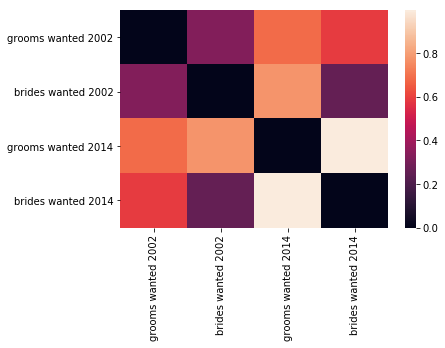

In [224]:
measure = 'KS' #"KL", "Chi2", "KS", "Wasserstein"
num_of_texts = 4 #The bigger this number the slower it will run, you can also try selecting your own plays
fileids_sp = list(final_df[:num_of_texts]['ad category'])
corpora_sp = list(final_df[:num_of_texts]['normalized_tokens'])

#corpora_sp = list(brides_info_2002[1:num_of_texts+1]['normalized_tokens'])

L = []
for p in corpora_sp:
    l = []
    for q in corpora_sp:
        l.append(Divergence(p,q, difference=measure))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids_sp, index = fileids_sp)
ax = sns.heatmap(div)
plt.show()

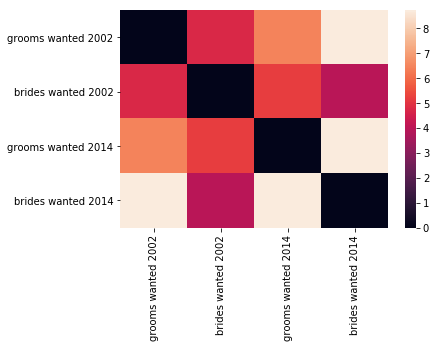

In [225]:
measure = 'Wasserstein' #"KL", "Chi2", "KS", "Wasserstein"
num_of_texts = 4 #The bigger this number the slower it will run, you can also try selecting your own plays
fileids_sp = list(final_df[:num_of_texts]['ad category'])
corpora_sp = list(final_df[:num_of_texts]['normalized_tokens'])

#corpora_sp = list(brides_info_2002[1:num_of_texts+1]['normalized_tokens'])

L = []
for p in corpora_sp:
    l = []
    for q in corpora_sp:
        l.append(Divergence(p,q, difference=measure))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids_sp, index = fileids_sp)
ax = sns.heatmap(div)
plt.show()